In [376]:
from scipy.optimize import curve_fit
import graph_tool.all as gt
from graph_tool.all import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})
plt.style.use('seaborn-v0_8-colorblind')
sns.set_palette(sns.color_palette("colorblind")[2:])

In [377]:
# Load constructed Maven dependency graph
g = gt.load_graph("network_data/maven_nontemp.gml")

In [378]:
# Load constructed Maven dependency graph
g_random_hn = gt.load_graph("data/random_hn.gml")

# Degree distribution

In [379]:
g_random_hn

<Graph object, directed, with 84035 vertices and 494606 edges, 1 internal graph property, at 0x7f4a18243550>

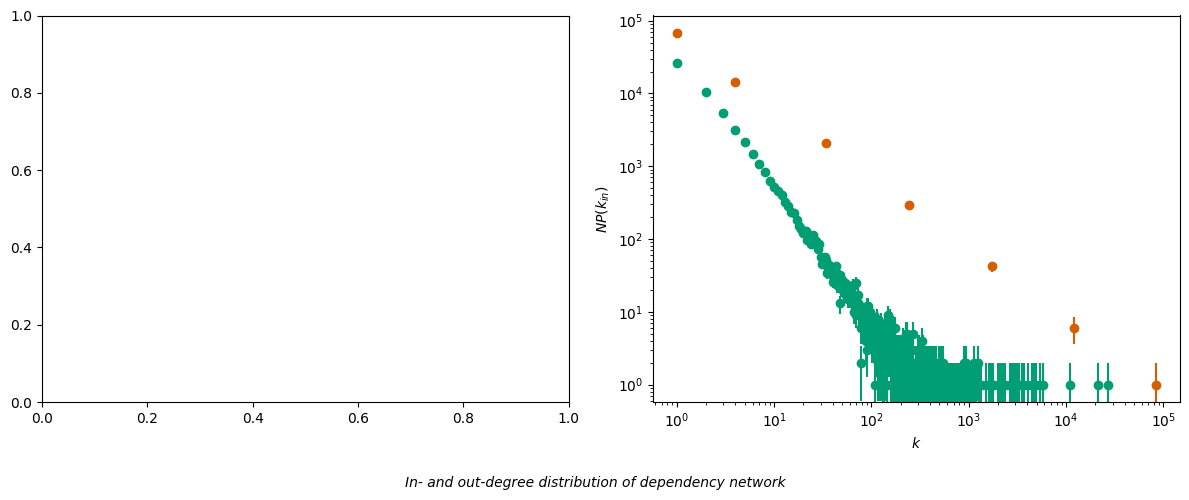

In [380]:
f, axs = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(12, 5))


# data
in_hist = gt.vertex_hist(g, "in")
out_hist = gt.vertex_hist(g, "out")
y = in_hist[0]
err = np.sqrt(in_hist[0])
axs[1].errorbar(in_hist[1][:-1], in_hist[0], fmt="o", yerr=err,
        label="Maven")

# y = out_hist[0]
# err = np.sqrt(out_hist[0])
# plt.errorbar(out_hist[1][:-1], out_hist[0], fmt="o", yerr=err,
#         label="out")


# data
in_hist = gt.vertex_hist(g_random_hn, "in")
out_hist = gt.vertex_hist(g_random_hn, "out")
y = in_hist[0]
err = np.sqrt(in_hist[0])
axs[1].errorbar(in_hist[1][:-1], in_hist[0], fmt="o", yerr=err,
        label="Barabasi")

# y = out_hist[0]
# err = np.sqrt(out_hist[0])
# plt.errorbar(out_hist[1][:-1], out_hist[0], fmt="o", yerr=err,
#         label="out")



plt.yscale("log")
plt.xscale("log")

plt.xlabel("$k$")
plt.ylabel("$NP(k_{in})$")

plt.suptitle("In- and out-degree distribution of dependency network", y=-0.02, fontsize=10, style='italic')


plt.tight_layout()
plt.show()

In [ ]:
f, axs = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(12, 5))

axs[0].scatter(in_degs, clust.a, alpha=0.5)
axs[1].scatter(out_degs, clust.a, alpha=0.5)

axs[0].scatter(in_degs_random, clust_random.a, alpha=0.5, color=sns.color_palette("colorblind")[3])
axs[1].scatter(out_degs_random, clust_random.a, alpha=0.5, color=sns.color_palette("colorblind")[3])

axs[0].set_xscale("log")
axs[1].set_xscale("log")

axs[0].set_yscale("log")
axs[1].set_yscale("log")

# Loop through each subplot and add labels
for i, ax in enumerate(axs.flat):
    # Add the subplot label with bold font, aligned to the left, and only showing the letter
    ax.text(-0.1, 1.1, chr(65+i), transform=ax.transAxes, fontsize=16, fontweight='bold', ha='left', va='top')

axs[0].set_xlabel("In-degree")
axs[1].set_xlabel("Out-degree")
axs[0].set_ylabel("Local clustering coefficient")

plt.suptitle(f'''Local clustering coefficient across in-/out-degree (A)/(B) for full network''', y=-0.02, fontsize=10, style='italic')


import matplotlib.patches as mpatches
fscore_patch = mpatches.Patch(color=sns.color_palette("colorblind").as_hex()[2], label='Maven')
prec_patch = mpatches.Patch(color=sns.color_palette("colorblind").as_hex()[3], label='Ravasz-Barabasi')
axs[1].legend(handles=[fscore_patch, prec_patch], loc="lower right")


plt.show()

In [385]:
def func_powerlaw(x, c, b):
    return c * np.power(x, b)

# Hiararchical network model

In [381]:
# data
out_degs = g.get_out_degrees(g.get_vertices())
clust = gt.local_clustering(g)
in_degs = g.get_in_degrees(g.get_vertices())

# random
out_degs_random = g_random_hn.get_out_degrees(g_random_hn.get_vertices())
clust_random = gt.local_clustering(g_random_hn)
in_degs_random = g_random_hn.get_in_degrees(g_random_hn.get_vertices())

In [336]:
clust_random.a

PropertyArray([1.16282516e-04, 6.66666667e-01, 6.66666667e-01, ...,
               9.64285714e-01, 9.64285714e-01, 9.64285714e-01])

In [341]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(np.log(in_degs_random.reshape((-1, 1))), np.log(clust_random.a))

LinearRegression()

In [345]:
model.intercept_

0.0021148802109746956

In [347]:
model.coef_

array([-0.28505009])

In [374]:
guess = (.1, -1)
popt, pcov = curve_fit(f=func_powerlaw, xdata=np.log(in_degs_random), ydata=np.log(clust_random.a))

popt

<ipython-input-367-8afec6a653a5>:2: RuntimeWarning: divide by zero encountered in power
  return np.power(x, b)


array([8.8107724e-08])

<ipython-input-385-6842556cd70b>:2: RuntimeWarning: divide by zero encountered in power
  return c * np.power(x, b)
<ipython-input-385-6842556cd70b>:2: RuntimeWarning: divide by zero encountered in power
  return c * np.power(x, b)


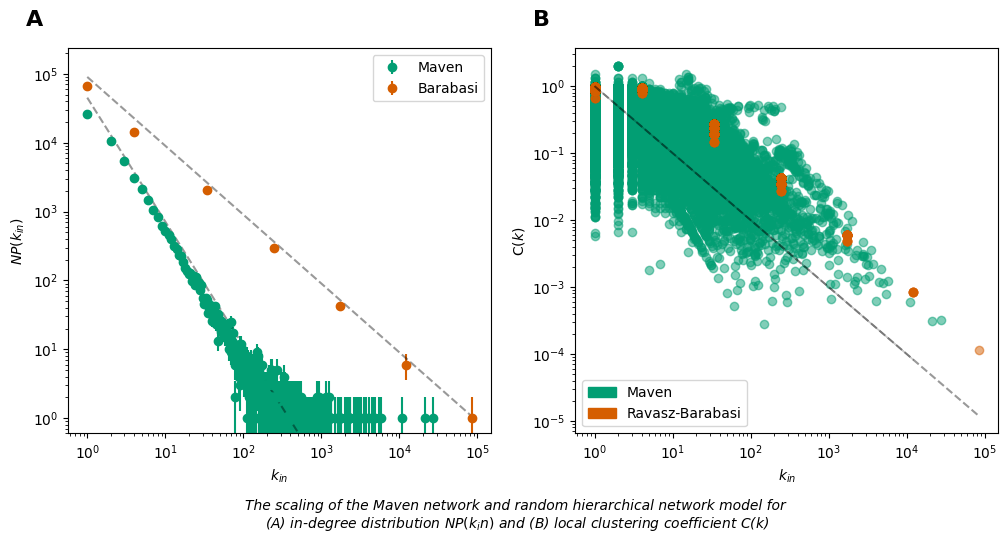

In [396]:
f, axs = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(12, 5))

axs[1].scatter(in_degs, clust.a, alpha=0.5)
# axs[1].scatter(out_degs, clust.a, alpha=0.5)

axs[1].scatter(in_degs_random, clust_random.a, alpha=0.5, color=sns.color_palette("colorblind")[3])
# axs[1].scatter(out_degs_random, clust_random.a, alpha=0.5, color=sns.color_palette("colorblind")[3])


# data
in_hist = gt.vertex_hist(g, "in")
out_hist = gt.vertex_hist(g, "out")
y = in_hist[0]
err = np.sqrt(in_hist[0])
axs[0].errorbar(in_hist[1][:-1], in_hist[0], fmt="o", yerr=err,
        label="Maven")
sns.lineplot(y=[func_powerlaw(x, 45000, -1.8) for x in in_hist[1][:-1]], x=in_hist[1][:-1], ax=axs[0], linestyle="--", alpha=0.4, color='black')

# random
in_hist = gt.vertex_hist(g_random_hn, "in")
out_hist = gt.vertex_hist(g_random_hn, "out")
y = in_hist[0]
err = np.sqrt(in_hist[0])
axs[0].errorbar(in_hist[1][:-1], in_hist[0], fmt="o", yerr=err,
        label="Barabasi")


# powerlaw
sns.lineplot(y=[func_powerlaw(x, 1, -1) for x in in_degs_random], x=in_degs_random, ax=axs[1], linestyle="--", alpha=0.4, color='black')
sns.lineplot(y=[func_powerlaw(x, 90000, -1) for x in in_hist[1][:-1]], x=in_hist[1][:-1], ax=axs[0], linestyle="--", alpha=0.4, color='black')


axs[0].set_xscale("log")
axs[1].set_xscale("log")

axs[0].set_yscale("log")
axs[1].set_yscale("log")

# Loop through each subplot and add labels
for i, ax in enumerate(axs.flat):
    # Add the subplot label with bold font, aligned to the left, and only showing the letter
    ax.text(-0.1, 1.1, chr(65+i), transform=ax.transAxes, fontsize=16, fontweight='bold', ha='left', va='top')

axs[0].set_xlabel("$k_{in}$")
axs[1].set_xlabel("$k_{in}$")
# axs[1].set_xlabel("Out-degree")
axs[1].set_ylabel("C$(k)$")
axs[0].set_ylabel("$NP(k_{in})$")

axs[0].set_ylim(0.6,)

plt.suptitle(f'''The scaling of the Maven network and random hierarchical network model for \n(A) in-degree distribution $NP(k_in)$ and (B) local clustering coefficient C(k) ''', y=-0.02, fontsize=10, style='italic')


import matplotlib.patches as mpatches
fscore_patch = mpatches.Patch(color=sns.color_palette("colorblind").as_hex()[2], label='Maven')
prec_patch = mpatches.Patch(color=sns.color_palette("colorblind").as_hex()[3], label='Ravasz-Barabasi')
axs[1].legend(handles=[fscore_patch, prec_patch], loc="lower left")


plt.show()